# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤

In [1]:
## –∏–º–ø–æ—Ä—Ç –∑–∞–∏–≤–∏—Å–∏–º–æ—Å—Ç–µ–π

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML

## –ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ

In [2]:
data = pd.read_csv("data_series.csv")
data['t'] = data['t'].apply(str)
HTML(data.T.to_html(header = False))

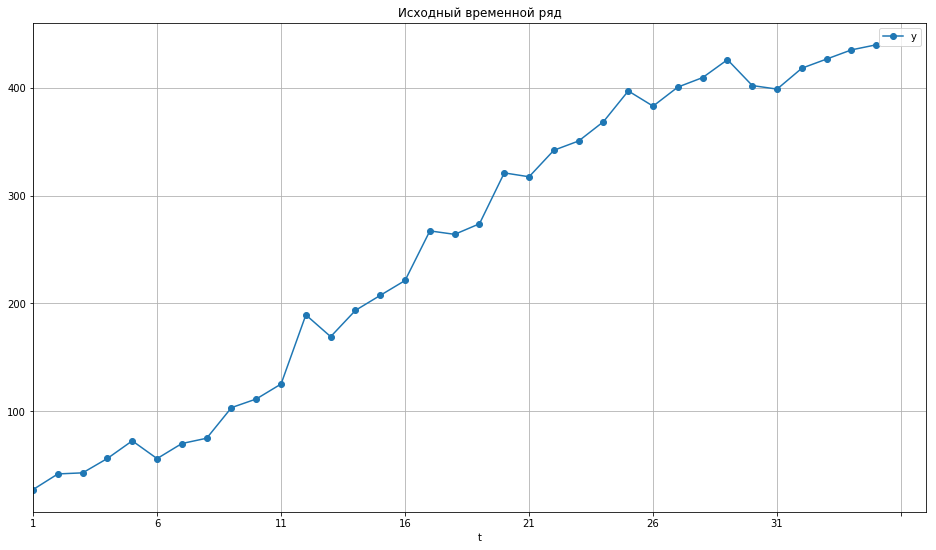

In [3]:
data.plot(x = 't', y = 'y', figsize=(16, 9), grid = True, marker='o',title = "–ò—Å—Ö–æ–¥–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥", xlim = (0,len(data)+1))

## –í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ

### –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —à–∞–≥–æ–≤ ($\tau$), –Ω–∞ –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥–µ—Ç –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è 
–î–ª—è –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π, –ø—Ä–æ–≥–Ω–æ–∑ –±—É–¥–µ—Ç –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è –Ω–∞ 4 —à–∞–≥–∞ –≤–ø–µ—Ä–µ–¥

In [4]:
TAU = 4

### –§—É–Ω–∫—Ü–∏—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ a,b –ø–æ –ú–ù–ö
–°–æ–≥–ª–∞—Å–Ω–æ –º–µ—Ç–æ–¥—É –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö –∫–≤–∞–¥—Ä–∞—Ç–æ–≤, —É—Ä–∞–≤–Ω–µ–Ω–∏–µ –¥–ª—è —Ç–æ—á–∫–∏ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è –ª–∏–Ω–∏–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ a —Å –æ—Å—å—é y –∏–º–µ–µ—Ç —Å–ª–µ–¥—É—é—â–∏–π –≤–∏–¥:
### <center>$a = \overline{y} - b\overline{x}$,</center>
–≥–¥–µ
## <center>$b = \frac{\sum_{i=1}^{n} (x_i-\overline{x})(y_i-\overline{y})}{\sum_{i=1}^{n} (x_i-\overline{x})^2}$</center>

In [5]:
def segment_slope(d, size = 5):
    d['t'] = d['t'].apply(int)
    X, Y = d.iloc[:size, 0], d.iloc[:size, 1]
    X_mean, Y_mean = np.mean(X), np.mean(Y)
    n,d = 0,0
    for i in range(len(X)):
        n += (X[i] - X_mean)*(Y[i] - Y_mean)
        d += (X[i] - X_mean)**2
    b = n / d
    a = Y_mean - b*X_mean
    return a,b

### –§—É–Ω–∫—Ü–∏—è –ª–∏–Ω–µ–π–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ a,b –æ—Ç –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π t
### <center>$y = a+bt$</center>
–ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è —Ä–∞—Å—á—ë—Ç–∞ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö —Ç—Ä–µ–Ω–¥-—Å–µ–∑–æ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –º–æ–¥–µ–ª—è—Ö –•–æ–ª—å—Ç–∞-–£–∏–Ω—Ç–µ—Ä—Å–∞ –∏ –¢–µ–ª–ª–∞-–í–µ–π–¥–∂–∞

In [6]:
linear = lambda a,b,t: a+b*t

### –§—É–Ω–∫—Ü–∏–∏ —Ä–∞—Å—á—ë—Ç–∞ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö —Ç—Ä–µ–Ω–¥-—Å–µ–∑–æ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π  –¥–ª—è –º–æ–¥–µ–ª–µ–π –•–æ–ª—å—Ç–∞-–£–∏–Ω—Ç–µ—Ä—Å–∞ –∏ –¢–µ–ª–ª–∞-–í–µ–π–¥–∂–∞
#### –î–ª—è –º–æ–¥–µ–ª–∏ –•–æ–ª—å—Ç–∞-–£–∏–Ω—Ç–µ—Ä—Å–∞ —Å–æ–≥–ª–∞—Å–Ω–æ —Ñ–æ—Ä–º—É–ª–µ:
### <center>$f_{i} = 0,5(\frac{y_i}{\hat{y}_i}+\frac{y_{i+4}}{\hat{y}_{i+4}}) \quad i \in [0,4]$</center>
#### –î–ª—è –º–æ–¥–µ–ª–∏ –¢–µ–ª–ª–∞-–í–µ–π–¥–∂–∞ —Å–æ–≥–ª–∞—Å–Ω–æ —Ñ–æ—Ä–º—É–ª–µ:
### <center>$f_{i} = 0,5(y_i-\hat{y}_i+y_{i+4}-\hat{y}_{i+4}) \quad i \in [0,4]$</center>
#### $\hat{y}_i$ - –∑–Ω–∞—á–µ–Ω–∏—è, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Å –ø–æ–º–æ—â—å—é —Ñ—É–Ω–∫—Ü–∏–∏ –ª–∏–Ω–µ–π–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏

In [7]:
SF_start_values = lambda y, yr: [0.5*(y[i]-yr[i]+y[i+4]-yr[i+4]) for i in range(4)]
HW_start_values = lambda y, yr: [0.5*(y[i]/yr[i]+y[i+4]/yr[i+4]) for i in range(4)]

### –§—É–Ω–∫—Ü–∏—è —Ä–∞—Å—á—ë—Ç–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ $R^2$
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ - —ç—Ç–æ –¥–æ–ª—è –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –æ–±—ä—è—Å–Ω—è–µ–º–∞—è —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º–æ–π –º–æ–¥–µ–ª—å—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏, —Ç–æ –µ—Å—Ç—å –æ–±—ä—è—Å–Ω—è—é—â–∏–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏. –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ –¥–ª—è –º–æ–¥–µ–ª–∏ —Å –∫–æ–Ω—Å—Ç–∞–Ω—Ç–æ–π –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è –æ—Ç 0 –¥–æ 1. –ß–µ–º –±–ª–∏–∂–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫ 1, —Ç–µ–º —Å–∏–ª—å–Ω–µ–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å. –ü—Ä–∏ –æ—Ü–µ–Ω–∫–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π —ç—Ç–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ—Ç—Å—è –∫–∞–∫ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –º–æ–¥–µ–ª–∏ –¥–∞–Ω–Ω—ã–º. –î–ª—è –ø—Ä–∏–µ–º–ª–µ–º—ã—Ö –º–æ–¥–µ–ª–µ–π –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è, —á—Ç–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å —Ö–æ—Ç—è –±—ã –Ω–µ –º–µ–Ω—å—à–µ 50 % (–≤ —ç—Ç–æ–º —Å–ª—É—á–∞–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø—Ä–µ–≤—ã—à–∞–µ—Ç –ø–æ –º–æ–¥—É–ª—é 70 %). –ú–æ–¥–µ–ª–∏ —Å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–º –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ –≤—ã—à–µ 80 % –º–æ–∂–Ω–æ –ø—Ä–∏–∑–Ω–∞—Ç—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–∏–º–∏ (–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø—Ä–µ–≤—ã—à–∞–µ—Ç 90 %). –ó–Ω–∞—á–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ 1 –æ–∑–Ω–∞—á–∞–µ—Ç —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏. –í –æ–±—â–µ–º —Å–ª—É—á–∞–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ –º–æ–∂–µ—Ç –±—ã—Ç—å –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–º, —ç—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –∫—Ä–∞–π–Ω–µ–π –Ω–µ–∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏: –ø—Ä–æ—Å—Ç–æ–µ —Å—Ä–µ–¥–Ω–µ–µ –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç –ª—É—á—à–µ.
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–µ:
## <center>$R^2 = 1- \frac{SS_{res}}{SS_{tot}}$,</center>
–≥–¥–µ:
### <center>$SS_{res} = \sum_{i=1}^{n} (y_i - \hat{y_{i}})^2 $,</center>
### <center>$SS_{tot} = \sum_{i=1}^{n} (y_i - \overline{y_{i}})^2 $</center>
$y$ - –∏—Å—Ö–æ–¥–Ω—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞
$\hat{y}$ - —Ä–∞—Å—á—ë—Ç–Ω—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞

In [8]:
def r_squared(Y,YTH):
    Y_mean = np.mean(Y)
    SS_res = sum([(Y[i] - YTH[i])**2 for i in range(len(Y))])
    SS_tot = sum([(item - Y_mean)**2 for item in Y])
    coef = 1-(SS_res/SS_tot)
    return "{}%".format(round(coef*100,2))

### –§—É–Ω–∫—Ü–∏—è —Ä–∞—Å—á—ë—Ç–∞ –∫—Ä–∏—Ç–µ—Ä–∏—è –î–∞—Ä–±–∏–Ω–∞-–£–æ—Ç—Å–æ–Ω–∞
–°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞–ª–∏—á–∏—è (–æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è) –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –≤ —Ä—è–¥–µ –æ—Å—Ç–∞—Ç–∫–æ–≤ —á–∞—â–µ –≤—Å–µ–≥–æ –æ—Å—É—â–µ—Å—Ç–≤–ª—è–µ—Ç—Å—è —Å –ø–æ–º–æ—â—å—é –∫—Ä–∏—Ç–µ—Ä–∏—è –î–∞—Ä–±–∏–Ω–∞ ‚Äî –£–æ—Ç—Å–æ–Ω–∞. –î–ª—è —ç—Ç–æ–≥–æ —Å—Ç—Ä–æ–∏–º —ç–º–ø–∏—Ä–∏—á–µ—Å–∫—É—é (—Ä–∞—Å—á–µ—Ç–Ω—É—é) —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –î–∞—Ä–±–∏–Ω–∞ ‚Äî –£–æ—Ç—Å–æ–Ω–∞ (d-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É), –∫–æ—Ç–æ—Ä–∞—è —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–µ:
## <center>$d = \frac{\sum_{i=2}^{n} (e_i-e_{i-1})^2}{\sum_{i=1}^{n} {e_i}^2}$,</center>
–≥–¥–µ $e$ - —Ä—è–¥ –æ—Å—Ç–∞—Ç–∫–æ–≤. –ó–Ω–∞—á–µ–Ω–∏–µ –ø–æ–ª—É—á–µ–Ω–Ω–æ–π d-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ —Å—Ä–∞–≤–Ω–∏–≤–∞–µ—Ç—Å—è —Å –≥—Ä–∞–Ω–∏—Ü–∞–º–∏ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π

In [9]:
darbin_watson = lambda e: {'value' : sum([(e[i] - e[i-1])**2 for i in range(1,len(e))])/sum([e[i]**2 for i in range(len(e))]),
                           'df': len(e)-1 }

### –§—É–Ω–∫—Ü–∏—è —Ä–∞—Å—á—ë—Ç–∞ R/S –∫—Ä–∏—Ç–µ—Ä–∏—è
–î–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ä—è–¥–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É –∑–∞–∫–æ–Ω—É —á–∞—â–µ –≤—Å–µ–≥–æ –ø—Ä–∏–º–µ–Ω—è—é—Ç —Ç–∞–∫ –Ω–∞–∑—ã–≤–∞–µ–º—ã–π R/S-–∫—Ä–∏—Ç–µ—Ä–∏–π
### <center>$R/S = \frac{e_{max}-e_{min}}{S_e}$,</center>
–ó–¥–µ—Å—å $e$ - —Ä—è–¥ –æ—Å—Ç–∞—Ç–∫–æ–≤, $e_{max}$ –∏ $e_{min}$ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∏ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏—è —É—Ä–æ–≤–Ω–µ–π —Ä—è–¥–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤, $S_e$ ‚Äî —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ —Ä—è–¥–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤ –æ—Ç —Å–≤–æ–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ.
### <center>$S_e = \sqrt{\frac{\sum_{i=1}^{n} (e_i-\overline{e})^2}{n-1}}$</center>
–ö—Ä–∏—Ç–∏—á–µ—Å–∫–∏–µ –≥—Ä–∞–Ω–∏—Ü—ã –æ—Ç–Ω–æ—à–µ–Ω–∏—è R/S –∑–∞–¥–∞–Ω—ã —Ç–∞–±–ª–∏—á–Ω–æ. –ì–∏–ø–æ—Ç–µ–∑–∞ –æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ä—è–¥–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É –∑–∞–∫–æ–Ω—É –ø—Ä–∏–Ω–∏–º–∞–µ—Ç—Å—è –Ω–∞ –≤—ã–±—Ä–∞–Ω–Ω–æ–º —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∞ –ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏, —á—Ç–æ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ (—Ä–∞—Å—á–µ—Ç–Ω–æ–µ) –∑–Ω–∞—á–µ–Ω–∏–µ R/S-–∫—Ä–∏—Ç–µ—Ä–∏—è –æ–∫–∞–∂–µ—Ç—Å—è –≤–Ω—É—Ç—Ä–∏ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏—Ö –≥—Ä–∞–Ω–∏—Ü –¥–ª—è –¥–∞–Ω–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏.

In [10]:
rs_crit = lambda e: round((max(e)-min(e))/np.std(e, ddof = 1),2)

### –§—É–Ω–∫—Ü–∏—è —Ä–∞—Å—á—ë—Ç–∞ t-–∫—Ä–∏—Ç–µ—Ä–∏—è –°—Ç—å—é–¥–µ–Ω—Ç–∞
–î–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑—ã –æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –æ–∂–∏–¥–∞–Ω–∏—è —É—Ä–æ–≤–Ω–µ–π —Ä—è–¥–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤ –Ω—É–ª—é, —Ç.–µ –æ —Ç–æ–º, —á—Ç–æ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä—è–¥–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –Ω–µ–∑–Ω–∞—á–∏–º–æ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –Ω—É–ª—è —Å—Ç—Ä–æ–∏—Ç—Å—è —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–∞—è (—Ä–∞—Å—á–µ—Ç–Ω–∞—è) t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:
## <center>$t = \frac{|\overline{e}-0|\sqrt{n}}{S_e}$</center>
–≥–¥–µ $e$ - —Ä—è–¥ –æ—Å—Ç–∞—Ç–∫–æ–≤. –ü—Ä–æ–≤–µ—Ä—è–µ–º—É—é –≥–∏–ø–æ—Ç–µ–∑—É –æ—Ç–∫–ª–æ–Ω—è–µ–º –Ω–∞ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ $–∞$, –≥–¥–µ $t_a$ ‚Äî –∫—Ä–∏—Ç–µ—Ä–∏–π —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –°—Ç—å—é–¥–µ–Ω—Ç–∞, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –† = (1-–∞)–∏ v = (n-l) —Å—Ç–µ–ø–µ–Ω—è–º —Å–≤–æ–±–æ–¥—ã. –í —Å–ª—É—á–∞–µ –ø—Ä–æ—Ç–∏–≤–æ–ø–æ–ª–æ–∂–Ω–æ–≥–æ –∑–Ω–∞–∫–∞ –Ω–µ—Ä–∞–≤–µ–Ω—Å—Ç–≤–∞ –Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è.

In [11]:
student = lambda e: {'value' :abs(np.mean(e)-0)*np.sqrt(len(e))/(np.std(e, ddof = 1)), 'df' : len(e)-1}

### –§—É–Ω–∫—Ü–∏—è —Ä–∞—Å—á—ë—Ç–∞ –∫—Ä–∏—Ç–µ—Ä–∏—è –ø–∏–∫–æ–≤
–ü—Ä–æ–≤–µ—Ä–∫–∞ —Å–ª—É—á–∞–π–Ω–æ—Å—Ç–∏ –∫–æ–ª–µ–±–∞–Ω–∏–π —É—Ä–æ–≤–Ω–µ–π –æ—Å—Ç–∞—Ç–æ—á–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –æ—Å—É—â–µ—Å—Ç–≤–ª—è–µ—Ç—Å—è –∫—Ä–∏—Ç–µ—Ä–∏–µ–º –ø–∏–∫–æ–≤ (–ø–æ–≤–æ—Ä–æ—Ç–Ω—ã—Ö —Ç–æ—á–µ–∫). –£—Ä–æ–≤–µ–Ω—å –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ $e_t$ —Å—á–∏—Ç–∞–µ—Ç—Å—è –º–∞–∫—Å–∏–º—É–º–æ–º, –µ—Å–ª–∏ –æ–Ω –±–æ–ª—å—à–µ –¥–≤—É—Ö —Ä—è–¥–æ–º —Å—Ç–æ—è—â–∏—Ö —É—Ä–æ–≤–Ω–µ–π, —Ç.–µ. $e_{t-1} < e_t > e_{t+1}$, –∏ –º–∏–Ω–∏–º—É–º–æ–º, –µ—Å–ª–∏ –æ–Ω –º–µ–Ω—å—à–µ –æ–±–æ–∏—Ö —Å–æ—Å–µ–¥–Ω–∏—Ö —É—Ä–æ–≤–Ω–µ–π, —Ç.–µ. $e_{t-1} > e_t < e_{t+1}$. –í –æ–±–æ–∏—Ö —Å–ª—É—á–∞—è—Ö $e_t$ —Å—á–∏—Ç–∞–µ—Ç—Å—è –ø–æ–≤–æ—Ä–æ—Ç–Ω–æ–π —Ç–æ—á–∫–æ–π; –æ–±—â–µ–µ —á–∏—Å–ª–æ –ø–æ–≤–æ—Ä–æ—Ç–Ω—ã—Ö —Ç–æ—á–µ–∫ –¥–ª—è –æ—Å—Ç–∞—Ç–æ—á–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ $e_t$ –æ–±–æ–∑–Ω–∞—á–∏–º —á–µ—Ä–µ–∑ —Ä. –í —Å–ª—É—á–∞–π–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–∂–∏–¥–∞–Ω–∏–µ —á–∏—Å–ª–∞ —Ç–æ—á–µ–∫ –ø–æ–≤–æ—Ä–æ—Ç–∞ —Ä –∏ –¥–∏—Å–ø–µ—Ä—Å–∏—è g –≤—ã—Ä–∞–∂–∞—é—Ç—Å—è —Ñ–æ—Ä–º—É–ª–∞–º–∏:
### <center>$p = \frac{2}{3}(n-2)$</center>
### <center>$g = \frac{16n-29}{90}$</center>
–ö—Ä–∏—Ç–µ—Ä–∏–µ–º —Å–ª—É—á–∞–π–Ω–æ—Å—Ç–∏ —Å 5%-–Ω—ã–º —É—Ä–æ–≤–Ω–µ–º –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏, —Ç.–µ. —Å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é 95%, —è–≤–ª—è–µ—Ç—Å—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –Ω–µ—Ä–∞–≤–µ–Ω—Å—Ç–≤–∞
### <center>$p > [\overline{p} - 1,96\sqrt{g}]$</center>
–≥–¥–µ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–µ —Å–∫–æ–±–∫–∏ –æ–∑–Ω–∞—á–∞—é—Ç —Ü–µ–ª—É—é —á–∞—Å—Ç—å —á–∏—Å–ª–∞. –ï—Å–ª–∏ —ç—Ç–æ –Ω–µ—Ä–∞–≤–µ–Ω—Å—Ç–≤–æ –Ω–µ –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è, —Ç—Ä–µ–Ω–¥–æ–≤–∞—è –º–æ–¥–µ–ª—å —Å—á–∏—Ç–∞–µ—Ç—Å—è –Ω–µ–∞–¥–µ–∫–≤–∞—Ç–Ω–æ–π.

In [12]:
def pick_crit(e):
    p = (2/3)*(len(e)-2)
    g = np.modf(p - 1.96*np.sqrt((16*len(e)-29)/90))
    return {
        'p:': p,
        'g:': g[1],
        'p > g:': p > g[1]
    }

## –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ë—Ä–∞—É–Ω–∞
–ú–æ–¥–µ–ª—å –ë—Ä–∞—É–Ω–∞ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è —Ñ–æ—Ä–º—É–ª–æ–π:
### <center>$y_{th} = a_0+a_1\tau$</center>
### –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ $\alpha$
–ó–¥–µ—Å—å –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ $\alpha$, –ø—Ä–æ—Ü–µ—Å—Å –ø–æ–∏—Å–∫–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ $\alpha$ –æ–ø–∏—Å–∞–Ω [–∑–¥–µ—Å—å](http://link). –ü–∞—Ä–∞–º–µ—Ç—Ä $\alpha$ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ $\beta$

In [13]:
alpha = 0.32334426

–ù–∞—Ö–æ–∂–¥–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ $\beta$ –∏ –Ω–∞—á–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π $a_0,a_1$ –ø–æ –º–µ—Ç–æ–¥—É –ú–ù–ö. 
–î–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∏ –∑–Ω–∞—á–µ–Ω–∏–π $a_0,a_1$ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –ø–∞—Ä–∞–º–µ—Ç—Ä $\beta = 1 - \alpha$

In [14]:
beta = 1 - alpha
a0,a1 = segment_slope(data)
print(a0, a1)

16.679999999999996 10.48


–ü—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è —Ä–∞—Å—á—ë—Ç $y_{th}$. –ö–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∞ –∑–Ω–∞—á–µ–Ω–∏–π $a_0,a_1$ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–∞–º:
### <center>$a_{0(t)} = a_{0(t-1}+a_{1(t-1)}+(1-{\beta}^2)\varepsilon{t}$</center>
### <center>$a_{1(t)} = a_{1(t-1}+(1-{\beta})^2\varepsilon{t}$</center>
$y_t$ —Ä–∞—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–µ:
### <center>$y_{th} = a_{0(t)}+a_{1(t)}$</center>
–†–∞—Å—á—ë—Ç –æ—à–∏–±–∫–∏ –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–µ:
### <center>$\overline{e} = \frac{|\overline{y}-\overline{\hat{y}}|}{\overline{y}}$,</center>
—á—Ç–æ —Ä–∞–≤–Ω–æ–∑–Ω–∞—á–Ω–æ:
### <center>$e_t = \frac{|y_t-\hat{y}_t|}{y_t}$</center>

In [15]:
y = data.iloc[:, 1]
yth = []
e = []
yth.append(sum([a0,a1]))
e.append(y[0]-yth[0])
e_appr = []
print(yth, e)
for i in range(1,len(y)):
    a0 = a0 + a1 + (1- beta**2)*e[i-1]
    a1 = a1 + (1 - beta)**2*e[i-1]
    yi = sum([a0,a1])
    yth.append(yi)
    e.append(y[i]-yi)
    
for i in range(0,len(y)):
    e_appr.append(abs(e[i])/y[i])

[27.159999999999997] [0.14000000000000412]


### –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü—ã

In [57]:
brown_model = data.copy()
brown_model['t'] = brown_model['t'].apply(str)
brown_model.insert(2, 'y*', yth)
brown_model.insert(3, 'e_appr', e_appr)
HTML(brown_model.T.to_html(header = False))

### –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
–í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ $y*$ - –º–æ–¥–µ–ª—å –ë—Ä–∞—É–Ω–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞, –Ω–∞–ª–æ–∂–µ–Ω–Ω–∞—è –Ω–∞ $y$ - –∏—Å—Ö–æ–¥–Ω—ã–π –≤—Ä–º–µ–Ω–Ω–æ–π —Ä—è–¥

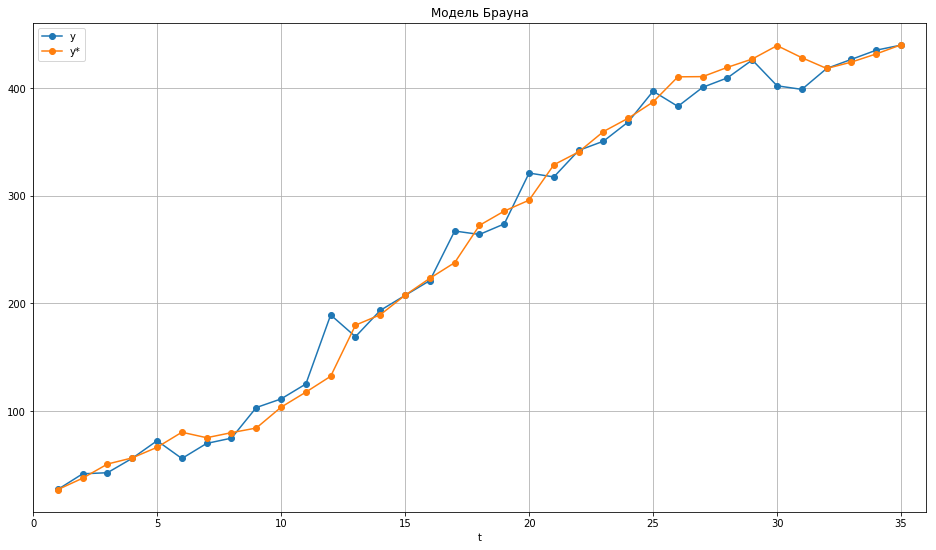

In [17]:
plot = brown_model.plot(x = 't', y = ['y','y*'], figsize=(16, 9), grid = True, marker='o',xlim = (0,len(data)+1), title = "–ú–æ–¥–µ–ª—å –ë—Ä–∞—É–Ω–∞")

## –ê–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å –∏ —Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏
### –°—Ä–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏

In [18]:
err = np.mean(e_appr)*100
print('{}%'.format(round(err,2)))

6.68%


### –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏

In [19]:
value = r_squared(y,yth)
print(value)

98.62%


### –ö—Ä–∏—Ç–µ—Ä–∏–π –î–∞—Ä–±–∏–Ω–∞-–£–æ—Ç—Å–æ–Ω–∞

In [20]:
value = darbin_watson(e_appr)
print(value)

{'value': 1.1351998098499423, 'df': 34}


–°–æ–≥–ª–∞—Å–Ω–æ [—Ç–∞–±–ª–∏—Ü–µ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∫—Ä–∏—Ç–µ—Ä–∏—è –î–∞—Ä–±–∏–Ω–∞-–£–æ—Ç—Å–æ–Ω–∞](https://helpstat.ru/statistika-darbina-uotsona-dl-i-du/), –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –ø—Ä–∏ —á–∏—Å–ª–µ —Å—Ç–µ–ø–µ–Ω–µ–π —Å–≤–æ–±–æ–¥—ã $df = 34$, –∏ —á–∏—Å–ª–µ –æ–±—ä—è—Å–Ω—è—é—â–∏—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö $k = 1$, –º–µ–Ω—å—à–µ $dl = 1,184$, —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç –Ω–∞–ª–∏—á–∏–µ –∞–≤—Ç–æ–∫–æ—Ä–µ–ª–ª—è—Ü–∏–∏ –≤ —Ä—è–¥–µ –æ—Å—Ç–∞—Ç–∫–æ–≤. –ò–∑ —ç—Ç–æ–≥–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –º–æ–¥–µ–ª—å –Ω–µ–ª—å–∑—è –Ω–∞–∑–≤–∞—Ç—å –∞–¥–µ–∫–≤–∞—Ç–Ω–æ–π

### R/S –∫—Ä–∏—Ç–µ—Ä–∏–π

In [21]:
value = rs_crit(e_appr)
print(value)

4.82


–°–æ–≥–ª–∞—Å–Ω–æ [—Ç–∞–±–ª–∏—Ü–µ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π R/S –∫—Ä–∏—Ç–µ—Ä–∏—è](https://studme.org/142770/marketing/proverka_adekvatnosti_tochnosti_modeli), –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –¥–ª—è –¥–ª–∏–Ω—ã –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ $l = 35$, –ª–µ–∂–∏—Ç –≤ –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ $3,58 < 4,82 < 4,84$, —á—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ $p = 0,05$. –ò–∑ —á–µ–≥–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –º–æ–¥–µ–ª—å –º–æ–∂–Ω–æ –Ω–∞–∑–≤–∞—Ç—å –∞–¥–µ–∫–≤–∞—Ç–Ω–æ–π

### t-–∫—Ä–∏—Ç–µ—Ä–∏–π –°—Ç—å—é–¥–µ–Ω—Ç–∞

In [22]:
value = student(e_appr)
print(value)

{'value': 4.3704658119140465, 'df': 34}


–°–æ–≥–ª–∞—Å–Ω–æ [—Ç–∞–±–ª–∏—Ü–µ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π t-–∫—Ä–∏—Ç–µ—Ä–∏—è –°—Ç—å—é–¥–µ–Ω—Ç–∞](https://statpsy.ru/t-student/t-test-tablica/) , –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –ø—Ä–∏ —á–∏—Å–ª–µ —Å—Ç–µ–ø–µ–Ω–µ–π —Å–≤–æ–±–æ–¥—ã $df = 34$ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –¥–∞–ª—å—à–µ —á–µ–º $3,601$, —á—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ $p = 0,001$. –ò–∑ —á–µ–≥–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –∏—Å—Å–ª–µ–¥—É–µ–º–æ–π –≤—ã–±–æ—Ä–∫–µ –Ω–µ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö.

### –ö—Ä–∏—Ç–µ—Ä–∏–π –ø–∏–∫–æ–≤

In [23]:
value = pick_crit(e)
print(value)

{'p:': 22.0, 'g:': 17.0, 'p > g:': True}


–°–æ–≥–ª–∞—Å–Ω–æ –∫—Ä–∏—Ç–µ—Ä–∏—é –ø–∏–∫–æ–≤, –º–æ–¥–µ–ª—å –º–æ–∂–Ω–æ –Ω–∞–∑–≤–∞—Ç—å –∞–¥–µ–∫–≤–∞—Ç–Ω–æ–π

## –ü—Ä–æ–≥–Ω–æ–∑ –ø–æ –º–æ–¥–µ–ª–∏ –ë—Ä–∞—É–Ω–∞ –Ω–∞ 4 —à–∞–≥–∞ –≤–ø–µ—Ä–µ–¥
–ü—Ä–æ–≥–Ω–æ–∑ –ø–æ –º–æ–¥–µ–ª–∏ –ë—Ä–∞—É–Ω–∞ –æ—Å—É—â–µ—Å—Ç–≤–ª—è–µ—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–µ:
### <center>$y_{th}(n+\tau) = a_{0(n)}+a_{1(n)}\tau$</center>

In [24]:
p = []
for i in range(1,TAU+1):
    yi = a0+a1*i
    p.append(yi)
print(p)

[440.0822253766901, 446.6513323376926, 453.22043929869517, 459.7895462596977]


### –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü—ã —Å–ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏

In [58]:
for index, item in enumerate(p):
    brown_model = brown_model.append({'t': 1+index+len(data['t']), 'pred': item}, ignore_index = True) 
brown_model.loc[len(data['t'])-1, 'pred'] = brown_model.loc[len(data['t'])-1,'y*']
brown_model['t'] = brown_model['t'].apply(str)
HTML(brown_model.T.to_html(header=False))

### –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
–ó–¥–µ—Å—å $y$ - –∏—Å—Ö–æ–¥–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥, $y*$ - –º–æ–¥–µ–ª—å, $pred$ - –ø—Ä–æ–≥–Ω–æ–∑

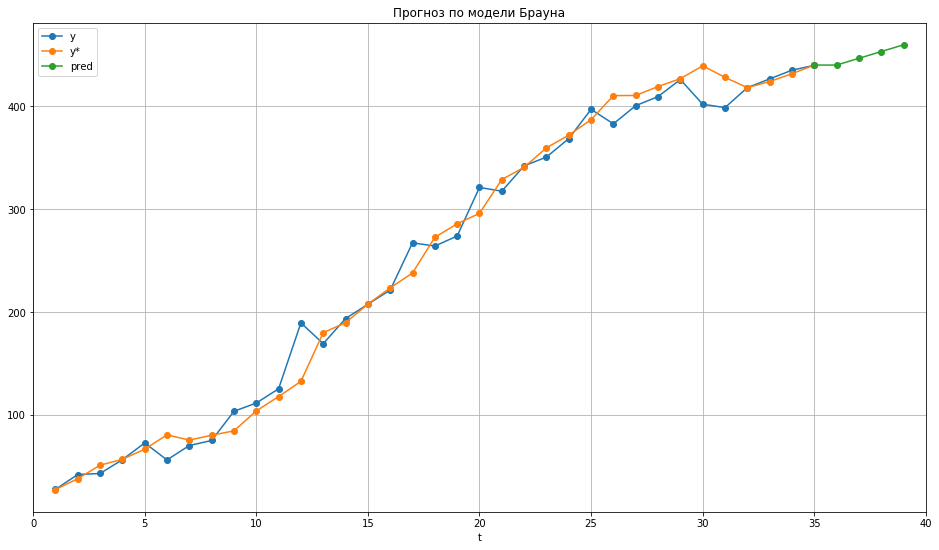

In [26]:
brown_model.plot(x = 't', y = ['y','y*', 'pred'], figsize=(16, 9), grid = True, marker='o', xlim = (0,len(brown_model)+1), title = "–ü—Ä–æ–≥–Ω–æ–∑ –ø–æ –º–æ–¥–µ–ª–∏ –ë—Ä–∞—É–Ω–∞")

## –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –•–æ–ª—å—Ç–∞-–£–∏–Ω—Ç–µ—Ä—Å–∞
–ú–æ–¥–µ–ª—å –•–æ–ª—å—Ç–∞-–£–∏–Ω—Ç–µ—Ä—Å–∞ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è —Ñ–æ—Ä–º—É–ª–æ–π:
### <center>$y_{th} = (a_0+\tau a_1)F_i$</center>

### –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è $\lambda_1, \lambda_2, \lambda_3$
–ó–¥–µ—Å—å –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ $\lambda_1, \lambda_2, \lambda_3$, –ø—Ä–æ—Ü–µ—Å—Å –ø–æ–∏—Å–∫–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ $\lambda_1, \lambda_2, \lambda_3$ –æ–ø–∏—Å–∞–Ω [–∑–¥–µ—Å—å](http://link).

In [27]:
l1, l2, l3 = 0.33136274, 0.3984803, 0.39224247

–ù–∞—Ö–æ–∂–¥–µ–Ω–∏–µ –Ω–∞—á–∞–ª—å–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ $a_0,a_1$ –ø—Ä–æ–∏–≤–∑–æ–¥–∏—Ç—Å—è –ø–æ –º–µ—Ç–æ–¥—É –ú–ù–ö. –ù–∞—Ö–æ–∂–¥–µ–Ω–∏–µ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö —Å–µ–∑–æ–Ω–Ω—ã—Ö —Ç—Ä–µ–Ω–¥–æ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è —Å–æ–≥–ª–∞—Å–Ω–æ —Ñ–æ—Ä–º—É–ª–∞–º, –æ–ø–∏—Å–∞–Ω–Ω—ã–º –≤—ã—à–µ

In [28]:
a0,a1 = segment_slope(data)
print(a0, a1)
y_r = [linear(a0,a1,i) for i in range(1,9)] 
y = data.iloc[:, 1]
f = HW_start_values(y,y_r)

16.679999999999996 10.48


### –¢—Ä–µ–Ω–¥—Å–µ–∑–æ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ –ø—Ä–µ–¥—ã–¥—É—â–∏–π –ø–µ—Ä–∏–æ–¥

In [29]:
frame = pd.DataFrame.from_dict({'t': [i+1 for i in range(-len(f),0)], 'f': f})
HTML(frame.to_html(index = False))

–ü—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è —Ä–∞—Å—á—ë—Ç $y_{th}$. –ö–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∞ –∑–Ω–∞—á–µ–Ω–∏–π $a_0,a_1$ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–∞–º:
### <center>$a_{0(t)} = \lambda_1\frac{y_t}{F_{t-l}}+(1-\lambda_1)(a_{0(t-1)}+a_{1(t-1)})$</center>
### <center>$F_t = \lambda_2\frac{y_t}{a_{0(t)}}+(1-\lambda_2)F_{t-l}$</center>
### <center>$a_{1(t)} = \lambda_3(a_{0(t)}-a_{0(t-1)})$</center>
$y_t$ —Ä–∞—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–µ:
### <center>$y_{th} = (a_{0(t)}+a_{1(t)})F_{t-l}$</center>
–†–∞—Å—á—ë—Ç –æ—à–∏–±–∫–∏ –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–µ:
### <center>$\overline{e} = \frac{|\overline{y}-\overline{\hat{y}}|}{\overline{y}}$,</center>
—á—Ç–æ —Ä–∞–≤–Ω–æ–∑–Ω–∞—á–Ω–æ:
### <center>$e_t = \frac{|y_t-\hat{y}_t|}{y_t}$</center>

In [30]:
yth, e, e_appr = [], [], []
for i in range(len(y)):
    yi = (a0+a1)*f[i]
    yth.append(yi)
    e.append(y[i]-yi)
    e_appr.append(abs(e[i])/y[i])
    temp = a0
    a0 = l1*(y[i]/f[i])+(1-l1)*(a0+a1)
    f.append(l2*(y[i]/a0)+(1-l2)*f[i])
    a1 = l3*(a0 - temp)+(1-l3)*a1

### –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü—ã

In [59]:
holt_winters_model = data.copy()
holt_winters_model['t'] = holt_winters_model['t'].apply(str)
holt_winters_model.insert(2, 'y*', yth)
holt_winters_model.insert(3, 'f', f[4:])
holt_winters_model.insert(4, 'e_appr', e_appr)
HTML(holt_winters_model.T.to_html(header = False))

### –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
–í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ  ùë¶‚àó  - –º–æ–¥–µ–ª—å –•–æ–ª—å—Ç–∞-–£–∏–Ω—Ç–µ—Ä—Å–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞, –Ω–∞–ª–æ–∂–µ–Ω–Ω–∞—è –Ω–∞  ùë¶  - –∏—Å—Ö–æ–¥–Ω—ã–π –≤—Ä–º–µ–Ω–Ω–æ–π —Ä—è–¥

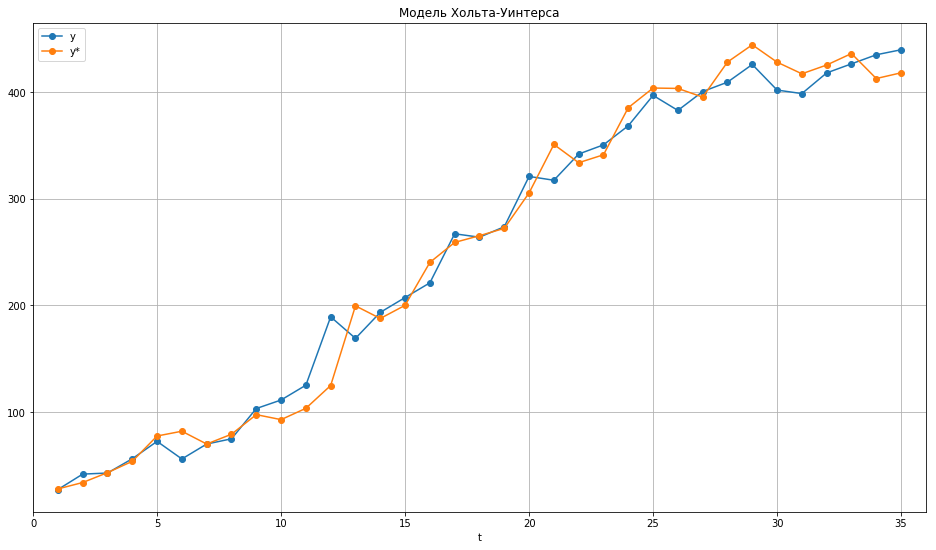

In [32]:
holt_winters_model.plot(x = 't', y = ['y','y*'], figsize=(16, 9), grid = True, marker='o', xlim = (0,len(data)+1), title = "–ú–æ–¥–µ–ª—å –•–æ–ª—å—Ç–∞-–£–∏–Ω—Ç–µ—Ä—Å–∞")

## –ê–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å –∏ —Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏
### –°—Ä–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏

In [33]:
err = np.mean(e_appr)*100
print('{}%'.format(round(err,2)))

7.54%


### –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏

In [34]:
value = r_squared(y,yth)
print(value)

98.27%


### –ö—Ä–∏—Ç–µ—Ä–∏–π –î–∞—Ä–±–∏–Ω–∞-–£–æ—Ç—Å–æ–Ω–∞

In [35]:
value = darbin_watson(e)
print(value)

{'value': 1.8696089513831313, 'df': 34}


### R/S –∫—Ä–∏—Ç–µ—Ä–∏–π

In [36]:
value = rs_crit(e)
print(value)

5.14


### t-–∫—Ä–∏—Ç–µ—Ä–∏–π –°—Ç—å—é–¥–µ–Ω—Ç–∞

In [37]:
value = student(e)
print(value)

{'value': 0.34924313103028304, 'df': 34}


### –ö—Ä–∏—Ç–µ—Ä–∏–π –ø–∏–∫–æ–≤

In [38]:
value = pick_crit(e)
print(value)

{'p:': 22.0, 'g:': 17.0, 'p > g:': True}


## –ü—Ä–æ–≥–Ω–æ–∑ –ø–æ –º–æ–¥–µ–ª–∏ –•–æ–ª—å—Ç–∞-–£–∏–Ω—Ç–µ—Ä—Å–∞ –Ω–∞ 4 —à–∞–≥–∞ –≤–ø–µ—Ä–µ–¥
–ü—Ä–æ–≥–Ω–æ–∑ –ø–æ –º–æ–¥–µ–ª–∏ –•–æ–ª—å—Ç–∞-–£–∏–Ω—Ç–µ—Ä—Å–∞ –æ—Å—É—â–µ—Å—Ç–≤–ª—è–µ—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–µ:
### <center>$y_{th}(n+\tau) = (a_{0(n)}+a_{1(n)}\tau)F_{t-l+\tau}$</center>

In [39]:
p = []
l = len(yth)
for i in range(1,TAU+1):
    yi = (a0+a1*i)*+f[i+len(yth)-1]
    p.append(yi)
print(p)

[447.0422410660401, 465.0300947668956, 457.99076123622933, 458.0839762952651]


### –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü—ã —Å–ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏

In [60]:
for index, item in enumerate(p):
    holt_winters_model = holt_winters_model.append({'t': 1+index+len(data['t']), 'pred': item}, ignore_index = True) 
holt_winters_model.loc[len(data['t'])-1, 'pred'] = holt_winters_model.loc[len(data['t'])-1,'y*']
holt_winters_model['t'] = holt_winters_model['t'].apply(str)
HTML(holt_winters_model.T.to_html(header=False))

### –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
–ó–¥–µ—Å—å $y$ - –∏—Å—Ö–æ–¥–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥, $y*$ - –º–æ–¥–µ–ª—å, $pred$ - –ø—Ä–æ–≥–Ω–æ–∑

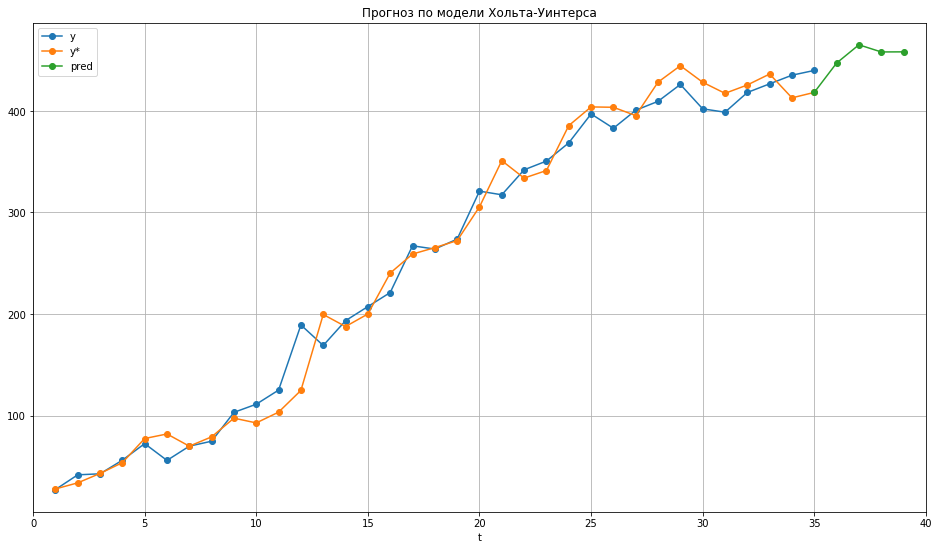

In [41]:
holt_winters_model.plot(x = 't', y = ['y','y*', 'pred'], figsize=(16, 9), grid = True, marker='o', xlim = (0,len(holt_winters_model)+1), title = "–ü—Ä–æ–≥–Ω–æ–∑ –ø–æ –º–æ–¥–µ–ª–∏ –•–æ–ª—å—Ç–∞-–£–∏–Ω—Ç–µ—Ä—Å–∞")

## –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –¢–µ–ª–ª–∞-–í–µ–π–¥–∂–∞
–ú–æ–¥–µ–ª—å –•–æ–ª—å—Ç–∞-–£–∏–Ω—Ç–µ—Ä—Å–∞ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è —Ñ–æ—Ä–º—É–ª–æ–π:
### <center>$y_{th} = a_0+a_1+W_t$</center>

### –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è $\lambda_1, \lambda_2, \lambda_3$
–ó–¥–µ—Å—å –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ $\lambda_1, \lambda_2, \lambda_3$, –ø—Ä–æ—Ü–µ—Å—Å –ø–æ–∏—Å–∫–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ $\lambda_1, \lambda_2, \lambda_3$ –æ–ø–∏—Å–∞–Ω [–∑–¥–µ—Å—å](http://link).

In [42]:
l1, l2, l3 =0.60859065, 0.10010188, 0.06798838

–ù–∞—Ö–æ–∂–¥–µ–Ω–∏–µ –Ω–∞—á–∞–ª—å–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ $a_0,a_1$ –ø—Ä–æ–∏–≤–∑–æ–¥–∏—Ç—Å—è –ø–æ –º–µ—Ç–æ–¥—É –ú–ù–ö. –ù–∞—Ö–æ–∂–¥–µ–Ω–∏–µ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö —Å–µ–∑–æ–Ω–Ω—ã—Ö —Ç—Ä–µ–Ω–¥–æ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è —Å–æ–≥–ª–∞—Å–Ω–æ —Ñ–æ—Ä–º—É–ª–∞–º, –æ–ø–∏—Å–∞–Ω–Ω—ã–º –≤—ã—à–µ

In [43]:
a0,a1 = segment_slope(data)
print(a0, a1)
y_r = [linear(a0,a1,i) for i in range(1,9)] 
print(y_r)
y = data.iloc[:, 1]
w = SF_start_values(y,y_r)

16.679999999999996 10.48
[27.159999999999997, 37.64, 48.12, 58.599999999999994, 69.08, 79.56, 90.03999999999999, 100.52]


### –¢—Ä–µ–Ω–¥—Å–µ–∑–æ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ –ø—Ä–µ–¥—ã–¥—É—â–∏–π –ø–µ—Ä–∏–æ–¥

In [44]:
frame = pd.DataFrame.from_dict({'t': [i+1 for i in range(-len(w),0)], 'w': w})
HTML(frame.to_html(index = False))

–ü—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è —Ä–∞—Å—á—ë—Ç $y_{th}$. –ö–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∞ –∑–Ω–∞—á–µ–Ω–∏–π $a_0,a_1$ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–∞–º:
### <center>$a_{0(t)} = \lambda_1(y_t-W_{t-l}+(1-\lambda)(a_{0(t-1)}+a_{1(t-1)})$</center>
### <center>$W_t = \lambda_3(y_t-a_{0(t)}+(1-\lambda_3)W_{t-l})$</center>
### <center>$a_{1(t)} = \lambda_2(a_{0(t)}-a_{0(t-1)+(1-\lambda_2)a_{1(t-1)}})$</center>
$y_t$ —Ä–∞—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–µ:
### <center>$y_{th} = a_{0(t)}+a_{1(t)}+W_{t-l}$</center>
–†–∞—Å—á—ë—Ç –æ—à–∏–±–∫–∏ –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–µ:
### <center>$\overline{e} = \frac{|\overline{y}-\overline{\hat{y}}|}{\overline{y}}$,</center>
—á—Ç–æ —Ä–∞–≤–Ω–æ–∑–Ω–∞—á–Ω–æ:
### <center>$e_t = \frac{|y_t-\hat{y}_t|}{y_t}$</center>

In [45]:
yth, e, e_appr = [], [], []
for i in range(len(y)):
    yi = a0+a1+w[i]
    yth.append(yi)
    e.append(y[i]-yi)
    e_appr.append(abs(e[i])/y[i])
    temp = a0
    a0 = l1*(y[i]-w[i])+(1-l1)*(a0+a1)
    a1 = l2*(a0-temp)+(1-l2)*a1
    w.append(l3*(y[i]-a0)+(1-l3)*w[i])    

### –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü—ã

In [61]:
tella_weige_model = data.copy()
tella_weige_model['t'] = tella_weige_model['t'].apply(str)
tella_weige_model.insert(2, 'y*', yth)
tella_weige_model.insert(3, 'w', w[4:])
tella_weige_model.insert(4, 'e_appr', e_appr)
HTML(tella_weige_model.T.to_html(header = False))

### –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
–í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ  ùë¶‚àó  - –º–æ–¥–µ–ª—å –¢–µ–ª–ª–∞-–í–µ–π–¥–∂–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞, –Ω–∞–ª–æ–∂–µ–Ω–Ω–∞—è –Ω–∞  ùë¶  - –∏—Å—Ö–æ–¥–Ω—ã–π –≤—Ä–º–µ–Ω–Ω–æ–π —Ä—è–¥

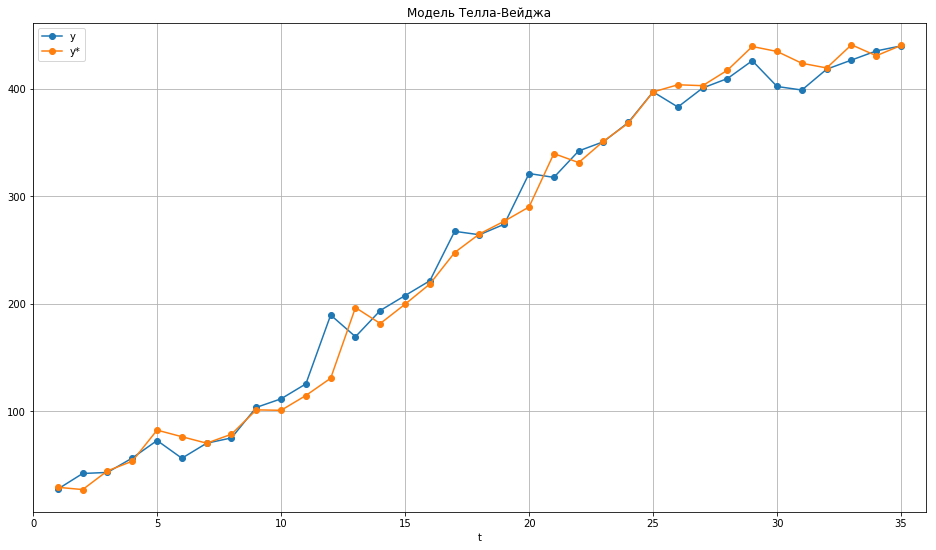

In [47]:
tella_weige_model.plot(x = 't', y = ['y','y*'], figsize=(16, 9), grid = True, marker='o', xlim = (0,len(data)+1), title = "–ú–æ–¥–µ–ª—å –¢–µ–ª–ª–∞-–í–µ–π–¥–∂–∞")

## –ê–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å –∏ —Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏
### –°—Ä–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏

In [48]:
err = np.mean(e_appr)*100
print('{}%'.format(round(err,2)))

6.92%


### –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏

In [49]:
value = r_squared(y,yth)
print(value)

98.61%


### –ö—Ä–∏—Ç–µ—Ä–∏–π –î–∞—Ä–±–∏–Ω–∞-–£–æ—Ç—Å–æ–Ω–∞

In [50]:
value = darbin_watson(e_appr)
print(value)

{'value': 1.0820127208850636, 'df': 34}


### R/S –ö—Ä–∏—Ç–µ—Ä–∏–π

In [51]:
value = rs_crit(e_appr)
print(value)

3.82


### t-–∫—Ä–∏—Ç–µ—Ä–∏–π –°—Ç—å—é–¥–µ–Ω—Ç–∞

In [52]:
value = student(e_appr)
print(value)

{'value': 4.374175423528227, 'df': 34}


### –ö—Ä–∏—Ç–µ—Ä–∏–π –ø–∏–∫–æ–≤

In [53]:
value = pick_crit(e_appr)
print(value)

{'p:': 22.0, 'g:': 17.0, 'p > g:': True}


## –ü—Ä–æ–≥–Ω–æ–∑ –ø–æ –º–æ–¥–µ–ª–∏ –¢–µ–ª–ª–∞-–í–µ–π–¥–∂–∞ –Ω–∞ 4 —à–∞–≥–∞ –≤–ø–µ—Ä–µ–¥
–ü—Ä–æ–≥–Ω–æ–∑ –ø–æ –º–æ–¥–µ–ª–∏ –¢–µ–ª–ª–∞-–í–µ–π–¥–∂–∞ –æ—Å—É—â–µ—Å—Ç–≤–ª—è–µ—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–µ:
### <center>$y_{th}(n+\tau) = a_{0(n)}+a_{1(n)}\tau + W_{t-l+\tau}$</center>

In [54]:
p = []
l = len(yth)
for i in range(1,TAU+1):
    yi = (a0+a1*i)+w[i+len(yth)-1]
    p.append(yi)
print(p)

[450.7149225344524, 472.0050494121682, 471.21434453579263, 477.9328969901375]


### –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü—ã —Å–ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏

In [62]:
for index, item in enumerate(p):
    tella_weige_model = tella_weige_model.append({'t': 1+index+len(data['t']), 'pred': item}, ignore_index = True) 
tella_weige_model.loc[len(data['t'])-1, 'pred'] = tella_weige_model.loc[len(data['t'])-1,'y*']
tella_weige_model['t'] = tella_weige_model['t'].apply(str)
HTML(tella_weige_model.T.to_html(header=False))

### –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞

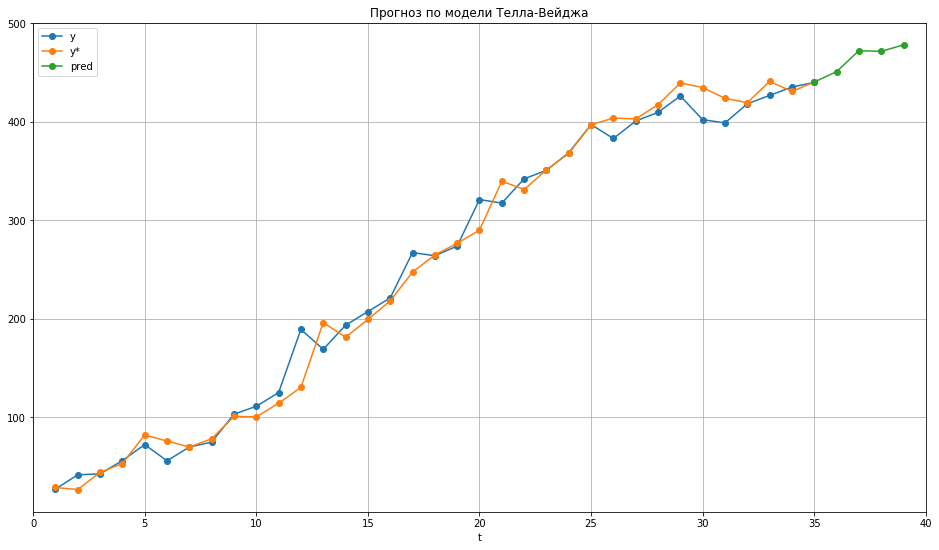

In [56]:
tella_weige_model.plot(x = 't', y = ['y','y*', 'pred'], figsize=(16, 9), grid = True, marker='o', xlim = (0,len(tella_weige_model)+1), title = "–ü—Ä–æ–≥–Ω–æ–∑ –ø–æ –º–æ–¥–µ–ª–∏ –¢–µ–ª–ª–∞-–í–µ–π–¥–∂–∞")